In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor(verbose=5)
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))
print(clf.coef_)
print(clf.intercept_)

-- Epoch 1
Norm: 4.63, NNZs: 13, Bias: 17.253495, T: 506, Avg. loss: 87.619864
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.29, NNZs: 13, Bias: 20.531720, T: 1012, Avg. loss: 18.734666
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.54, NNZs: 13, Bias: 21.657449, T: 1518, Avg. loss: 13.143894
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.74, NNZs: 13, Bias: 22.106832, T: 2024, Avg. loss: 12.062084
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.81, NNZs: 13, Bias: 22.326466, T: 2530, Avg. loss: 11.780476
Total training time: 0.00 seconds.
22.876298785317328
[-0.67768914  0.67380813 -0.41156522  0.73991173 -0.9884379   3.16959099
 -0.0297047  -1.9374856   0.87153084 -0.54908636 -1.82626651  0.87503696
 -3.49779664]
[22.32646649]


In [5]:
#https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch,batch_size=1):
    coef = [0.0 for i in range(len(train[0]))]
    epoch_array=[]
    sum_error_list=[]
    loss_test_list=[]
    for epoch in range(n_epoch):
        l_rate/=1.2
        sum_error = 0
        batch_random=np.random.randint(0,505,batch_size)
        miniSizeData=[]
        for j in batch_random:
            miniSizeData.append(train[j])
        #print(len(miniSizeData))
        for row in miniSizeData:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        if(epoch%500==0):
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        if(epoch%10==0):
            loss_test=0
            for k in train:
                loss_test+=(k[-1]-predict(k,coef))**2
            loss_test=loss_test/506
            #print(loss_test)
            loss_test_list.append(loss_test)
            epoch_array.append(epoch)
            sum_error_list.append(sum_error)
        
    return (coef,epoch_array,sum_error_list,loss_test_list)

# Calculate coefficients
print(X.shape)
print(Y.shape)
dataset=np.hstack((X,Y.reshape(-1,1)))
print(dataset.shape)
l_rate = 0.1
n_epoch = 1000
batch_size=50
coef,epoc_list,error_list,test_loss_list = coefficients_sgd(dataset, l_rate, n_epoch,batch_size)
print(coef)

(506, 13)
(506,)
(506, 14)
>epoch=0, lrate=0.083, error=13733.971
>epoch=500, lrate=0.000, error=1757.862
[22.532266705022188, -1.0012731329690208, 0.8683269275269782, -0.517582513802867, 1.2238993614240108, -2.234957769039841, 2.4500910709717094, -0.22513667881422142, -3.1522334140075077, 1.6370779894625853, -0.41843311057737453, -1.8441773241195654, 0.5833651538640957, -4.085601411613757]


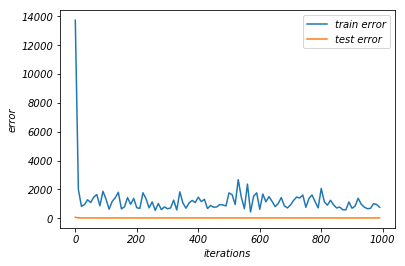

In [6]:
import matplotlib.pyplot as plt
plt.plot(epoc_list,error_list)
plt.plot(epoc_list,test_loss_list)
plt.legend({"train error":"","test error":""})
plt.xlabel("iterations")
plt.ylabel("error")
plt.show()

## Personal Observations:
##### 1. As train error and test error are coinciding, it seems that this could be achieved with smaller number of iterations. 
###### 2. As the test error never incresed suddenly/drastically, it prooves that model is not overfitting to train data.
##### 3. Seems like a ideal model to me.

In [7]:
loss_test=0
for k in dataset:
    loss_test+=(k[-1]-predict(k,coef))**2
loss_test=loss_test/506
print("MSE is: ",loss_test)

MSE is:  22.656399816553336


In [8]:
prediction_after=[]
for i in range(506):
    prediction_after.append(predict(X[i],coef))

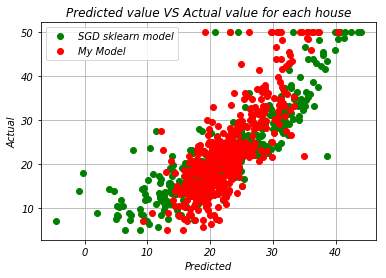

In [9]:
plt.plot(clf.predict(X),Y,'go')
plt.plot(prediction_after,Y,'ro')
plt.grid()
plt.title("Predicted value VS Actual value for each house")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.legend({"SGD sklearn model":"","My Model":""})

In [10]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["parameter","SGD scikit learn", "SGD Self"]

for i in range(len(coef)-1):
    x.add_row(["Weight"+str(i+1),clf.coef_[i],coef[i+1]])
x.add_row(["Intercept",clf.intercept_[0],coef[0]])
x.add_row(["Mean Squared error",mean_squared_error(Y, clf.predict(X)),loss_test])
print(x)

+--------------------+-----------------------+----------------------+
|     parameter      |    SGD scikit learn   |       SGD Self       |
+--------------------+-----------------------+----------------------+
|      Weight1       |  -0.6776891434877932  | -1.0012731329690208  |
|      Weight2       |   0.6738081252106184  |  0.8683269275269782  |
|      Weight3       |  -0.41156521935717855 |  -0.517582513802867  |
|      Weight4       |   0.7399117300927041  |  1.2238993614240108  |
|      Weight5       |  -0.9884379046448893  |  -2.234957769039841  |
|      Weight6       |   3.1695909915160487  |  2.4500910709717094  |
|      Weight7       | -0.029704695287332872 | -0.22513667881422142 |
|      Weight8       |   -1.937485595018574  | -3.1522334140075077  |
|      Weight9       |   0.8715308355259027  |  1.6370779894625853  |
|      Weight10      |  -0.5490863614174125  | -0.41843311057737453 |
|      Weight11      |  -1.8262665064557841  | -1.8441773241195654  |
|      Weight12     

##### This method is using pre trained StandardScaler().

In [11]:
new_point_list= [1.4866e-01,0.0000e+00,8.5600e+00,0.0000e+00,5.2000e-01,6.7270e+00,7.9900e+01,2.7778e+00,5.0000e+00,3.8400e+02,2.0900e+01,3.9476e+02,9.4200e+00]
print("for query point -> ",new_point_list)
new_point = np.array(new_point_list)
new_point= new_point.reshape(1,13)
after_standardization = scaler.transform(new_point)
after_standardization=after_standardization[0]
pred=coef[0]
for j in range(0,13):
    pred+=after_standardization[j]*coef[j+1]
print("My Prediction will be: ",pred)

for query point ->  [0.14866, 0.0, 8.56, 0.0, 0.52, 6.727, 79.9, 2.7778, 5.0, 384.0, 20.9, 394.76, 9.42]
My Prediction will be:  25.235892808273846


##### Without standardization of query point, while our model is trained on standardized points, I dont know how to predict. I think its not possible. Please let me know